In [139]:
import arviz as az
from bambi import Model
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
import statsmodels.formula.api as smf
import seaborn as sns

In [2]:
data = "https://raw.githubusercontent.com/avehtari/ROS-Examples/master/ElectionsEconomy/data/hibbs.dat"
hibbs = pd.read_csv(data, delimiter=" ")
hibbs

,year,growth,vote,inc_party_candidate,other_candidate
0,1952,2.40,44.60,Stevenson,Eisenhower
1,1956,2.89,57.76,Eisenhower,Stevenson
2,1960,0.85,49.91,Nixon,Kennedy
3,1964,4.21,61.34,Johnson,Goldwater
4,1968,3.02,49.60,Humphrey,Nixon
5,1972,3.62,61.79,Nixon,McGovern
6,1976,1.08,48.95,Ford,Carter
7,1980,-0.39,44.70,Carter,Reagan
8,1984,3.86,59.17,Reagan,Mondale
9,1988,2.27,53.94,"Bush, Sr.",Dukakis


In [3]:
model = Model(hibbs)
M1 = model.fit('vote ~ growth', samples=1000, chains=4)

Auto-assigning NUTS sampler...
INFO:pymc3:Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
INFO:pymc3:Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
INFO:pymc3:Multiprocess sampling (4 chains in 4 jobs)
NUTS: [vote_sd, growth, Intercept]
INFO:pymc3:NUTS: [vote_sd, growth, Intercept]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 5 seconds.
INFO:pymc3:Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 5 seconds.
There were 5 divergences after tuning. Increase `target_accept` or reparameterize.
ERROR:pymc3:There were 5 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.702618965090784, but should be close to 0.8. Try to increase the number of tuning steps.
/home/tommy/miniconda3/envs/stan/lib/python3.8/site-packages/arviz/data/io_pymc3.py:87: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


In [4]:
az.summary(M1, round_to=1)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
Intercept[0],47.2,1.7,43.9,50.3,0.0,0.0,1234.4,1231.2,1236.1,1667.1,1.0
growth[0],2.6,0.7,1.2,3.9,0.0,0.0,1264.4,1264.4,1266.3,1610.5,1.0
vote_sd,4.0,0.7,2.8,5.3,0.0,0.0,1121.6,1028.5,1189.0,911.0,1.0


In [11]:
model.backend.model

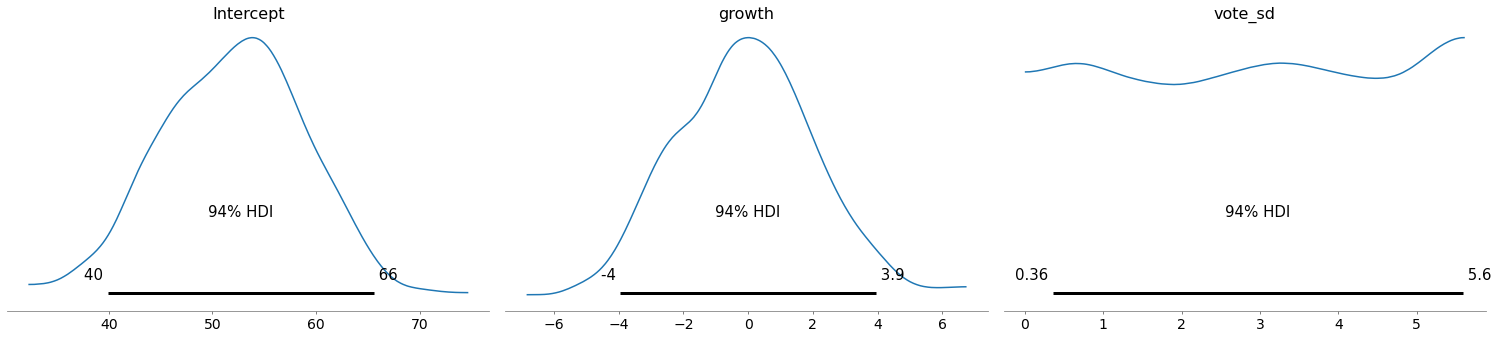

In [13]:
model.plot();

In [23]:
import patsy
from patsy import dmatrix

In [24]:
a = ["a1", "a1", "a2", "a2"]
b = ["b1", "b2", "b1", "b2"]
mat = dmatrix("1 + a:b")
mat

DesignMatrix with shape (4, 4)
  Intercept  b[T.b2]  a[T.a2]:b[b1]  a[T.a2]:b[b2]
          1        0              0              0
          1        1              0              0
          1        0              1              0
          1        1              0              1
  Terms:
    'Intercept' (column 0)
    'a:b' (columns 1:4)

In [20]:
print(dir(mat))

['T', '__abs__', '__add__', '__and__', '__array__', '__array_finalize__', '__array_function__', '__array_interface__', '__array_prepare__', '__array_priority__', '__array_struct__', '__array_ufunc__', '__array_wrap__', '__bool__', '__class__', '__complex__', '__contains__', '__copy__', '__deepcopy__', '__delattr__', '__delitem__', '__dict__', '__dir__', '__divmod__', '__doc__', '__eq__', '__float__', '__floordiv__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__gt__', '__hash__', '__iadd__', '__iand__', '__ifloordiv__', '__ilshift__', '__imatmul__', '__imod__', '__imul__', '__index__', '__init__', '__init_subclass__', '__int__', '__invert__', '__ior__', '__ipow__', '__irshift__', '__isub__', '__iter__', '__itruediv__', '__ixor__', '__le__', '__len__', '__lshift__', '__lt__', '__matmul__', '__mod__', '__module__', '__mul__', '__ne__', '__neg__', '__new__', '__or__', '__pos__', '__pow__', '__radd__', '__rand__', '__rdivmod__', '__reduce__', '__reduce_ex__', '__repr__', '_

In [45]:
x = np.random.normal(0, 1, 10)
y = np.random.normal(0, 1, 10)
f = np.arange(10)

dmatrix("1 + x + f + x:f", return_type="dataframe")

,Intercept,x,f,x:f
0,1.0,0.229338,0.0,0.000000
1,1.0,1.235000,1.0,1.235000
2,1.0,0.474034,2.0,0.948068
3,1.0,-0.582669,3.0,-1.748008
4,1.0,-1.264801,4.0,-5.059204
5,1.0,-0.092166,5.0,-0.460828
6,1.0,0.017041,6.0,0.102249
7,1.0,0.693974,7.0,4.857820
8,1.0,0.597010,8.0,4.776083
9,1.0,0.915160,9.0,8.236439


In [46]:
from patsy import ModelDesc, Term, EvalFactor
ModelDesc([Term([EvalFactor("y")])],
          [Term([]),
           Term([EvalFactor("a")]),
           Term([EvalFactor("a"), EvalFactor("b")]),
           Term([EvalFactor("np.log(x)")])
           ])

ModelDesc(lhs_termlist=[Term([EvalFactor('y')])],
          rhs_termlist=[Term([]),
                        Term([EvalFactor('a')]),
                        Term([EvalFactor('a'), EvalFactor('b')]),
                        Term([EvalFactor('np.log(x)')])])

In [52]:
md = ModelDesc.from_formula("y ~ a + a:b + np.log(x)")
md = ModelDesc.from_formula("0 + np.log(x1 + x2) + (x + {6: x3, 8 + 1: x4}[3 * i])")
md.describe()
md

ModelDesc(lhs_termlist=[],
          rhs_termlist=[Term([EvalFactor('np.log(x1 + x2)')]),
                        Term([EvalFactor('x')]),
                        Term([EvalFactor('{6: x3, 8 + 1: x4}[3 * i]')])])

In [36]:
print(dir(md))

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_repr_pretty_', 'describe', 'from_formula', 'lhs_termlist', 'rhs_termlist']


# Patsy Quickstart
- Offers transformations of the data in the creation of the design matrices
- Patsy becomes particularly useful when you have categorical data. If you use a predictor that has a categorical type (e.g. strings or bools), it will be automatically coded.
- Ensures that matrices are "full rank" and aren't "overdetermined"

In [140]:
from patsy import dmatrices, dmatrix, demo_data
data = demo_data("a", "b", "x1", "x2", "y", "z column")
data = pd.DataFrame(data)
data

,a,b,x1,x2,y,z column
0,a1,b1,1.764052,-0.103219,1.494079,2.269755
1,a1,b2,0.400157,0.410599,-0.205158,-1.454366
2,a2,b1,0.978738,0.144044,0.313068,0.045759
3,a2,b2,2.240893,1.454274,-0.854096,-0.187184
4,a1,b1,1.867558,0.761038,-2.552990,1.532779
5,a1,b2,-0.977278,0.121675,0.653619,1.469359
6,a2,b1,0.950088,0.443863,0.864436,0.154947
7,a2,b2,-0.151357,0.333674,-0.742165,0.378163


In [76]:
y, X = dmatrices("y ~ x1 + x2", data)

betas, residuals, rank, s = np.linalg.lstsq(X, y, rcond=None)
for name, beta in zip(X.design_info.column_names, betas.ravel()):
    print(f"{name}: {beta:.2f}")

Intercept: 0.58
x1: 0.09
x2: -1.76


In [78]:
# patsy builtins - transform data
print(dir(patsy.builtins))

['C', 'ContrastMatrix', 'Diff', 'Helmert', 'I', 'Poly', 'Q', 'Sum', 'Treatment', '__all__', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__spec__', 'bs', 'cc', 'center', 'cr', 'scale', 'standardize', 'te', 'test_I', 'test_Q']


In [95]:
# T. means that they are treatment coded
dmatrix("a", data).view()  # numpy array
dmatrix("0 + a + b", data)

DesignMatrix with shape (8, 3)
  a[a1]  a[a2]  b[T.b2]
      1      0        0
      1      0        1
      0      1        0
      0      1        1
      1      0        0
      1      0        1
      0      1        0
      0      1        1
  Terms:
    'a' (columns 0:2)
    'b' (column 2)

In [96]:
X = dmatrix("a + b + a:b", data)
y = data["y"]

betas, residuals, rank, s = np.linalg.lstsq(X, y, rcond=None)
for name, beta in zip(X.design_info.column_names, betas.ravel()):
    print(f"{name}: {beta:.2f}")

Intercept: -0.53
a[T.a2]: 1.12
b[T.b2]: 0.75
a[T.a2]:b[T.b2]: -2.14


In [105]:
y_hat = np.dot(X, betas)

0    1.494079
1   -0.205158
2    0.313068
3   -0.854096
4   -2.552990
5    0.653619
6    0.864436
7   -0.742165
Name: y, dtype: float64

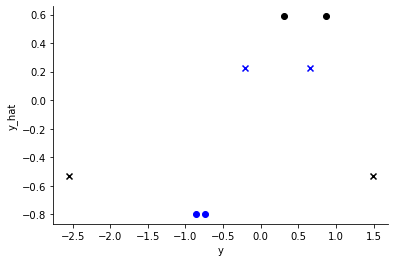

In [124]:
markers = ["x" if a == "a1" else "o" for a in data.a]
colors = ["k" if b == "b1" else "blue" for b in data.b]
for m, c, d in zip(markers, colors, zip(y, y_hat)):
    plt.scatter(d[0], d[1], marker=m, color=c)
    
ax = plt.gca()
ax.set_xlabel("y")
ax.set_ylabel("y_hat")
sns.despine()

In [127]:
X = dmatrix("a:x1", data)
y = data["y"]

betas, residuals, rank, s = np.linalg.lstsq(X, y, rcond=None)
for name, beta in zip(X.design_info.column_names, betas.ravel()):
    print(f"{name}: {beta:.2f}")
    
y_hat = np.dot(X, betas)

# Test / Prediction Example
# https://stackoverflow.com/questions/45535500/formatting-design-matrix-for-regression
design_info = X.design_info
test = data.iloc[-2:]
dmatrix(design_info, test, return_type="dataframe")

Intercept: 0.11
a[a1]:x1: -0.41
a[a2]:x1: -0.16


AttributeError: 'DesignMatrix' object has no attribute 'describe'

In [141]:
from patsy import balanced
balanced(a=2, b=2)

In [148]:
# ?dmatrix

# Splines

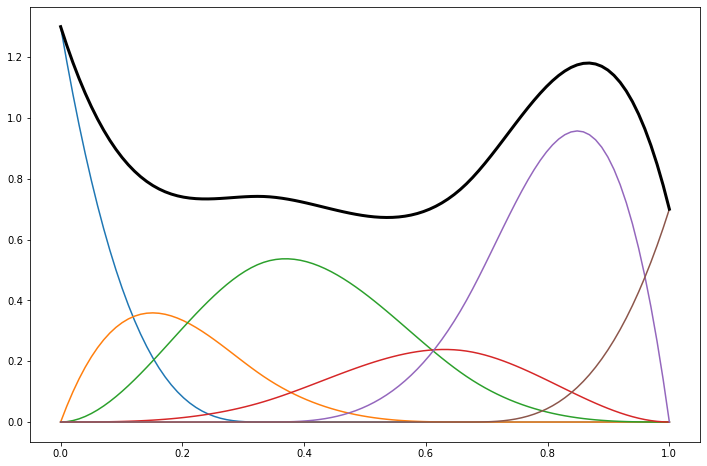

In [187]:
# ValueError: df=6 with degree=2 implies 3 knots, but 4 knots were provided
# knots = [0.2, 0.4, 0.6, 0.8]
knots = None

x = np.linspace(0, 1, 100)

# df = the number of basis splines using
# degree = the degree of the splines
y = dmatrix(f"bs(x, df=6, degree=3, include_intercept=True, knots={knots}) - 1", {"x": x}, return_type="dataframe")
b = np.array([1.3, 0.6, 0.9, 0.4, 1.6, 0.7])

f, ax = plt.subplots(figsize=(12, 8))
plt.plot(x, y*b)
plt.plot(x, np.dot(y,b), color="k", linewidth=3)
ax = plt.gca()
if knots is not None:
    for k in knots:
        ax.axvline(k, ls="--", color="k", alpha=0.6)

In [156]:
y

,Intercept,"bs(x, df=6, degree=3, include_intercept=False, knots=None)[0]","bs(x, df=6, degree=3, include_intercept=False, knots=None)[1]","bs(x, df=6, degree=3, include_intercept=False, knots=None)[2]","bs(x, df=6, degree=3, include_intercept=False, knots=None)[3]","bs(x, df=6, degree=3, include_intercept=False, knots=None)[4]","bs(x, df=6, degree=3, include_intercept=False, knots=None)[5]"
0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,1.0,0.113981,0.002388,0.000011,0.000000,0.000000,0.000000
2,1.0,0.213963,0.009311,0.000088,0.000000,0.000000,0.000000
3,1.0,0.300637,0.020406,0.000297,0.000000,0.000000,0.000000
4,1.0,0.374697,0.035310,0.000704,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...
95,1.0,0.000000,0.000000,0.000704,0.035310,0.374697,0.589289
96,1.0,0.000000,0.000000,0.000297,0.020406,0.300637,0.678660
97,1.0,0.000000,0.000000,0.000088,0.009311,0.213963,0.776638
98,1.0,0.000000,0.000000,0.000011,0.002388,0.113981,0.883619


### Natural Cubic Regression Spline

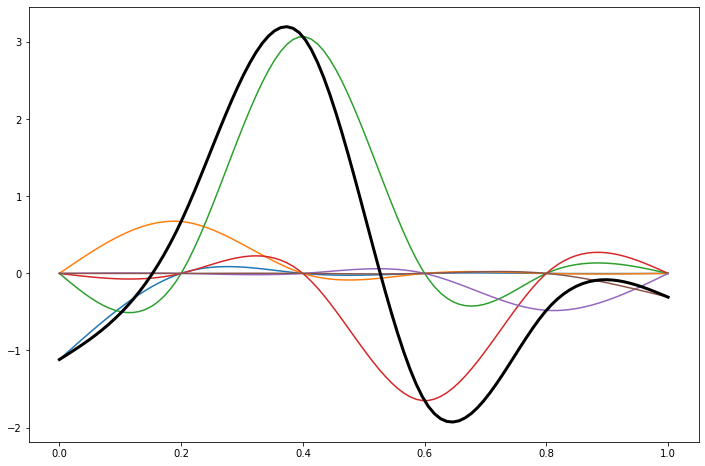

In [168]:
df = 6
y = dmatrix(f"cr(x, df={df}) - 1", return_type="dataframe")
f, ax = plt.subplots(figsize=(12, 8))
b = np.random.normal(0, 1, df)
plt.plot(x, y*b)
plt.plot(x, np.dot(y,b), color="k", linewidth=3)

### Cyclic Spline

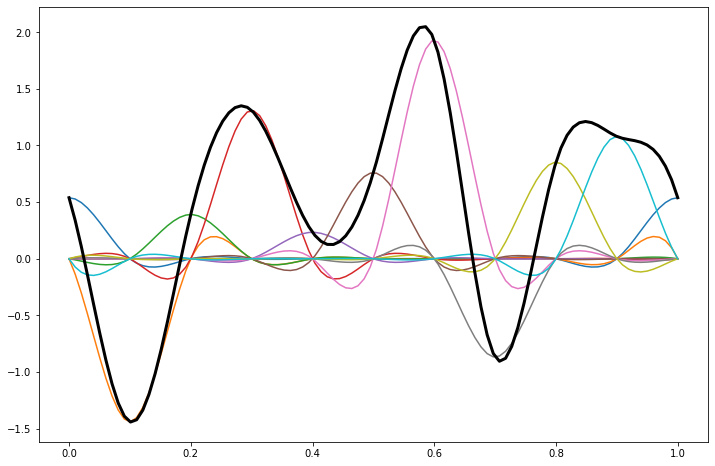

In [173]:
df = 10
y = dmatrix(f"cc(x, df={df}) - 1", return_type="dataframe")
f, ax = plt.subplots(figsize=(12, 8))
b = np.random.normal(0, 1, df)
plt.plot(x, y*b)
plt.plot(x, np.dot(y,b), color="k", linewidth=3)